# Assignment 4

**Submission deadlines:**
- get at least 4 points by Tuesday, 11.05.2021
- remaining points: last lab session before or on Tuesday, 18.05.2021

**Points:** Aim to get 12 out of 15+ possible points


## Submission instructions
The class is held remotely. To submit your solutions please show the notebook over the video call. Make sure you know all the questions and answers, and that the notebook contains results (before presentation do `Runtime -> Restart and run all`)

We provide starter code, however, you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Problem 1: Word Embeddings [4p]

Many natural language processing tasks requrie continuous representations for words.
[Word embeddings](https://en.wikipedia.org/wiki/Word_embedding) are mappings from a discrete
space to real-valued vectors. Word embeddings might be trained with neural networks,
either as a by-product of other tasks (e.g., language modeling, neural machine translation),
or with networks designed specifically for the word embedding task.

Two problems associated with training neural word embeddings are related to the speed of training:
(a) large volume of data, on which the network has to be trained on, and (b) time required to compute
output probability distribution over large vocabularities.

One of the most popular architectures for training word embeddings is called Word2vec [[1]()], [[2]()]. It builds on the idea that semantics of a word can be defined through the contexts,
in which the word appears in the sentence.

Let $w_1, w_2,\ldots,w_N$ be an $N$-word sentence in a natural language.
We define a context of a word $w_l$ a list of $n$ preceeding and following words
$w_{l-n},\ldots,w_{l-1},w_{l+1},\dots,w_{l+n}$.

The underlying assumption is that similar words appear in similar contexts.
For instance, words *Poland* and *Monaco* are similar in a sense, that they are singular nouns
describing abstract concepts of existing, european countries.
We can convince ourselves by looking at exceprts from Wikipedia articles
on Poland and Monaco:

* Despite **Monaco's independence** and separate foreign policy
* aimed to preserve **Poland's independence** and the szlachta's

* **Monaco joined the** Council of Europe in 2004
* **Poland joined the** Schengen Area in 2007

* nearly one-fifth **of Poland's population** – half of them
* Christians comprise a total of 83.2% **of Monaco's population**.

### Tasks
You will use word vectors pre-computed on a large dataset.
1. **[1p]** It has been observed, that word embeddings allow to perform semantic arithmetic where, for instance

    **king** - **man** + **woman** ~= **queen**

    This *analogy* task is often used as a quality measure of word embeddings. Load word embeddings and compute
    their analogy score on a dataset of analogous pairs, expressed as an accuracy of accuracy of predicting a pair
    item (**queen** in the example above). Specifically, compare `FastText` and `Word2vec` word embeddings.
    
2. **[1p]** Word embedding capture approximate semantics. Under an assumption that words of similar semantics
    exist in different languages, a mapping $W: \mathbb{R}^{300}\mapsto\mathbb{R}^{300}$ might be constructed that
    translates word embeddings between languages. It has been shown that such ortonormal mappings allow to express
    approximate, bilingual dictionaries. In addition, non-linear mappings do not offer additional benefits.

    Given a simple English-Polish dictionary of word pairs (sourced from Wikitionary)
    find an orthonormal mapping $W$ between English and Polish `FastText`
    word embeddings using Procrustes analysis.

3. **[1p]** Word embeddings can often be nicely visualized.
    Make a 2-D `PCA` plot of word embeddings for countries and their capital cities
    for `FastText` or `Word2vec`. Connect each country with its capital city with a line segment.
    Can you see any regularities?
    
4. **[1p]** Plot 400 roughly most frequent words' embeddings (either `FastText` or `Word2vec`) in 2-D with `PCA`.
    Skip stop words, punctuations, artifact words, etc. You can be imprecise and use heuristics
    (e.g., select words than are at lest 3 charactes long).
    Can you see any regularities? Another method of making meaningful visualizations is `t-SNE`.
    
    Make another 2-D visualization, this time using `t-SNE`. Visualizations with `t-SNE` are obtained
    with gradient descent. Try to tweak optimization parameters to get lower optimization error,
    than the one with default parameters.
    Can you see any regularities this time?

# Problem 2: kNN Talker [11p+]

In this exercise you will build a simple chatbot that uses distributed representations of words and sentences to perform a nearest neighbor selection of responses.

We have collected two sets of data:
- `./reddit_pairs.txt` of excerpts of [Reddit](https://www.reddit.com/) conversations,
- `./hackernews_pairs.txt` of excertps from [Hackernews](https://news.ycombinator.com/).

The two corpuses are formatted as `tab`-separated pairs of utterances: a `prompt` and a `response`. Successive lines belong to different conversations.

The main idea of the chatbot is to build a representation of the user `input` and of all `prompts` from the corpus. Then select the best (or randomly one of the top few) matches and print the associated `response`.

The key to get the bot working is to create good sentence representations. We will try:
- averaging word embeddings
- using sentence models such as BERT.

### Warning:
The Reddit corpus may contain abusive language, it was not heavily cleaned.

### Tasks
The code below is a starting point, but you can develop you own. The following list suggests some actions to try, along with the points that reflect our subjective hardness. The exercise is worth 6 regular points (i.e. the report, word embedding-based model and BERT-based model), anything on top of it will be counted as a bonus.

1. [2p] Type in a Markdown cell a report of your actions, what did you try, why, what was the result. Show exemplary conversations (they must be probable under your model). Cherry-pick 3 nice dialogues.
2. [2p] Represent sentences by averaging their word vectors. Properly handle tokenization (you can use regular expressions or e.g. `nltk` library). Describe how you handle lower and upper cased words. Try a few nearest neighbor selection methods (such as euclidean or cosine distance). See how embedding normalization affects the results (you can normalize individual word vectors, full sentence vectors etc.).
3. [2p] Use the [transformers](https://huggingface.co/transformers) package to load a pretrained BERT model. Use it to represent sentences by e.g. averaging the activations in the last layer.
4. [1p] Incoportate context: keep a running average of past conversation turns.
5. [1p] Do data cleaning (including profanieties), finding rules for good responses.
6. [1p] Try mixing different sentence representation techniques.
7. [2p] Try to cluster responses to the highest scored prompts. Which responses are more funny: from the largerst or from the smallest clusters?.
8. [1p+] Implement your own enhancements.


# Starter code

In [ ]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.

# Download word vectors
!pip install -q gdown httpimport
![ -e word2vec.tar.xz ] || gdown 'https://drive.google.com/uc?id=1v6D8IjYVFlonhQuN_J3PML5KSVQSpbED' -O word2vec.tar.xz
![ -d word2vec ] || tar Jxf word2vec.tar.xz

# Download conversation corpuses
![ -e  hackernews_pairs.txt ] || gdown 'https://drive.google.com/uc?id=10cp2maNp1suzc5BaFQwDJr2GTKXHQOz_' -O hackernews_pairs.txt
![ -e  reddit_pairs.txt ] || gdown 'https://drive.google.com/uc?id=1Uf0Xl9aqQVBBpOwhYTV7iWCwj95FDqtL' -O reddit_pairs.txt

Downloading...
From: https://drive.google.com/uc?id=1v6D8IjYVFlonhQuN_J3PML5KSVQSpbED
To: /content/word2vec.tar.xz
395MB [00:02, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=10cp2maNp1suzc5BaFQwDJr2GTKXHQOz_
To: /content/hackernews_pairs.txt
4.39MB [00:00, 29.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Uf0Xl9aqQVBBpOwhYTV7iWCwj95FDqtL
To: /content/reddit_pairs.txt
3.89MB [00:00, 61.5MB/s]


In [ ]:
!pip install -Iv urllib3==1.25.4

Created temporary directory: /tmp/pip-ephem-wheel-cache-og2krmt2
Created temporary directory: /tmp/pip-req-tracker-zc861h_s
Created requirements tracker '/tmp/pip-req-tracker-zc861h_s'
Created temporary directory: /tmp/pip-install-6axrt0mm
1 location(s) to search for versions of urllib3:
* https://pypi.org/simple/urllib3/
Getting page https://pypi.org/simple/urllib3/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/urllib3/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/urllib3/ HTTP/1.1" 200 10060
Updating cache with response from "https://pypi.org/simple/urllib3/"
Caching due to etag
Analyzing links from page https://pypi.org/simple/urllib3/
  Found link https://files.pythonhosted.org/packages/9c/ed/c5fd0a26ba4c013a9320149edad93cf3440c6148fa6cc541d9b624ee398e/urllib3-0.3.tar.gz#sha256=b9b944d1f1ffb580488c1adee8683c6b887ee1a1912b43ba19de4039d17510d5 (from https

In [ ]:
# Huggingface Transformers implementation
!pip install -q tqdm boto3 requests regex sentencepiece sacremoses
!pip install -q transformers

     |████████████████████████████████| 133kB 8.2MB/s 
     |████████████████████████████████| 1.2MB 14.9MB/s 
     |████████████████████████████████| 901kB 37.7MB/s 
     |████████████████████████████████| 81kB 11.6MB/s 
     |████████████████████████████████| 7.5MB 55.1MB/s 
     |████████████████████████████████| 2.3MB 7.2MB/s 
     |████████████████████████████████| 3.3MB 50.0MB/s 


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import collections

import codecs

import numpy as np
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import distance

import nltk
import sklearn
nltk.download('punkt')

import pprint
import gensim

import io
from tqdm.autonotebook import tqdm


import torch


import tabulate

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## 1.1: Analogies

In [ ]:
# Word embeddings assign a vector to each word. To use them we need three things:
# 1. the embeddings themselves
# 2. a dictionary from words to their embedding ids
# 3. an inverse dictionary

Embedding = collections.namedtuple(
    'Embedding',
    ['vec', 'word2idx', 'idx2word'])

In [ ]:
def load_vecs_npy(base_path):
    """Load small embeddings in .npy format."""
    vec = np.load(base_path + '.npy')
    idx2word = [l.strip() for l in codecs.open(
                      base_path + '.txt', 'r', 'utf-8')]
    word2idx = {w:i for (i,w) in enumerate(idx2word)}
    return Embedding(vec, word2idx, idx2word)

In [ ]:
# Load top 200k word embeddings: Word2vec and FastText
word2vec = load_vecs_npy('word2vec/word2vec_GoogleNews_200k')
ftext = load_vecs_npy('word2vec/fasttext_wikien_200k')

In [ ]:
def load_analogies():
    '''Load tuples of analogies, e.g., (man, woman, king, queen)'''
    questions_path = 'word2vec/questions-words.txt'
    analogies = [l.strip().split() for l in open(questions_path, 'r') \
                 if not l.startswith(':')]
    return analogies

In [ ]:
def eval_analogies(vecs, analogies):
    """
    Compute the accuracy on the analogy task.
    
    In the task, quadruples of words are given (q1, q2, r1, r2).
    The words q1 and q2 are bound by a relation. The words r1 and r2 
    are bound by the same relation. The task is to predict r2 knowing words
    q1, q2, and r1.
    
    Example:
    Quadruple [King, Queen, Man, Woman] yields the question
    King is to Queen as Man is to ????
    
    Args:
        word_vecs: Embeddings tupes
        analogies: list of quadruples: (q1, q2, r1, r2)
        
    Returns:
        percentage of correct answers
    """
    indexes = [[vecs.word2idx.get(w, None) for w in tupl] \
                for tupl in analogies]
    indexes = [tupl for tupl in indexes \
               if all([v is not None for v in tupl])]
    # indexes holds quadruples of ints giving the ids of words from our vocab.
    indexes = np.asarray(indexes)
    print('Got vocab for %d/%d pairs' % (indexes.shape[0], len(analogies)))
    
    # Extract the vectors for the query words
    q1 = vecs.vec[indexes[:, 0]]
    q2 = vecs.vec[indexes[:, 1]]
    r1 = vecs.vec[indexes[:, 2]]
    
    # Extractr the word IDs for the correct answers
    r2_inds = indexes[:, 3]

    #
    # TODO 
    #
    # Compute the approximate location of word r2 as r2 = r1 + (q2 - q1)
    # Find the word closest to this location using cosine distance.
    # Return it's id and compute the accurracy.
    #

    r2_pred = r1 + (q2 - q1)
    
    
    # Normalize length and compute dot product between r2_pred and word_vecs
    # to get cosine distance
    r2_pred_norm = r2_pred / np.sqrt((r2_pred ** 2).sum(axis=1))[:, None]
    vecs_norm = vecs.vec / np.sqrt((vecs.vec ** 2).sum(axis=1))[:, None]
    
    # Compute in chunks to save memory
    r2_pred_inds = np.concatenate([np.argmax(r2_pred_norm[i:i+1000].dot(vecs_norm.T), axis=1) \
                                   for i in range(0, r2_pred.shape[0], 1000)])
    return 100.0 * (r2_pred_inds == r2_inds).sum() / r2_inds.shape[0]

In [ ]:
# Load analogy tuples, e.g., (man, woman, king, queen)
analogies = load_analogies()

# Some are uppercased geographical names (and FastTexts are lowercased)
analogies_lower = [[w.lower() for w in tupl] for tupl in analogies]

print(analogies[0])
print(analogies_lower[0])

['Athens', 'Greece', 'Baghdad', 'Iraq']
['athens', 'greece', 'baghdad', 'iraq']


In [ ]:
# Keep in mind that the vocab is restricted to 200k most freq words
# (in the training corpus!)
print('FastText analogy task accuracy:')
print('-------------------------------')
# Fast-text was trained on lowercased text only
print(eval_analogies(ftext, analogies_lower), '% correct')

print('\nWord2vec analogy task accuracy:')
print('-------------------------------')
# Word2vec has case information
print(eval_analogies(word2vec, analogies), '% correct')

FastText analogy task accuracy:
-------------------------------
Got vocab for 19420/19544 pairs
16.374871266735326 % correct

Word2vec analogy task accuracy:
-------------------------------
Got vocab for 18783/19544 pairs
20.859287653729435 % correct


## 1.2: translation through alignment of vector spaces

In [ ]:
# We're need Polish embeddings
ftext_pl = load_vecs_npy('word2vec/fasttext_wikipl_200k')

# Load a simple wikitionary-based dict of word pairs
en_pl = [l.strip().split('\t') for l in codecs.open(
    'word2vec/word2vec_en_pl', 'r', 'utf-8') if not '<UNK>' in l]
en_pl = {t[0]:t[1] for t in en_pl if len(t) == 2}

# Keep those, for which we have embeddings
en_pl = {en:pl for (en,pl) in en_pl.items() \
         if en in ftext.word2idx and pl in ftext_pl.word2idx}
print('Dictionary size:', len(en_pl))
print('good --', en_pl['good'])

Dictionary size: 750
good -- dobro


In [ ]:
# Select word embeddings for dictionary words
en_words = sorted(en_pl.keys())
V_en = ftext.vec[[ftext.word2idx[w] for w in en_words]]
V_pl = ftext_pl.vec[[ftext_pl.word2idx[en_pl[w]] for w in en_words]]
print(V_en.shape, V_pl.shape)

(750, 300) (750, 300)


In [ ]:
# Find an orthogonal transformation from V_en to V_pl.
# which minimizes square reconstruction error
W = orthogonal_procrustes(V_en, V_pl)[0]

In [ ]:
def translate(W, v, vecs2):
    #
    # TODO
    #
    # Transform source word vector v using W getting a location in target space.
    # Find the closest word in target space using the cosine distance.
    #
    vecs_norm = vecs2.vec / np.sqrt((vecs2.vec ** 2).sum(axis=1))[:, None]

    v_translated = v @ W
    v_translated = v_translated / np.sqrt((v_translated ** 2).sum())
    
    idx = np.argmax(v_translated @ vecs_norm.T)
    return vecs2.idx2word[idx]

# Select random, fairly frequent words not from the dictionary
tr_words = [i for i in np.random.randint(1000, 2000, 100) \
            if ftext.idx2word[i] not in en_pl]
tr_words = tr_words[:20]

rows = [[ftext.idx2word[i], translate(W, ftext.vec[i], ftext_pl)] \
         for i in tr_words] 
print(tabulate.tabulate(rows))

-----------  -------------
flight       zond
netherlands  mirador
managed      zdołali
squadron     bombardował
wall         ściana
journal      publikacja
boston       grygiel
previously   wcześniej
write        pisać
vice         wiceprezydent
israel       izraelskie
assembly     parlamentarne
owned        właściciel
medicine     onkologia
allowed      zabronić
scott        sebastian
publication  publikacja
conflict     konflikt
multiple     konkretny
clearly      rzeczywiście
-----------  -------------


## 1.3: PCA

In [ ]:
capitals = [l.strip().split('\t') for l in codecs.open('word2vec/countries_capitals', 'r', 'utf-8')]
capitals = {country:capital for (country,capital) in capitals}

# Select those present in Word2vec vocab
capitals = {k:v for (k,v) in capitals.items() \
            if k in word2vec.word2idx and v in word2vec.word2idx}

# Flatten the array to have a list of [country, capital, country, capital, ...]
geo = [e for pair in capitals.items() for e in pair]
print(len(geo) // 2, 'pairs', geo[:6])

131 pairs ['Afghanistan', 'Kabul', 'Albania', 'Tirana', 'Algeria', 'Algiers']


In [ ]:
geo_inds = [word2vec.word2idx[w] for w in geo]
geo_vecs = word2vec.vec[geo_inds]
print(geo_vecs.shape)

(262, 300)


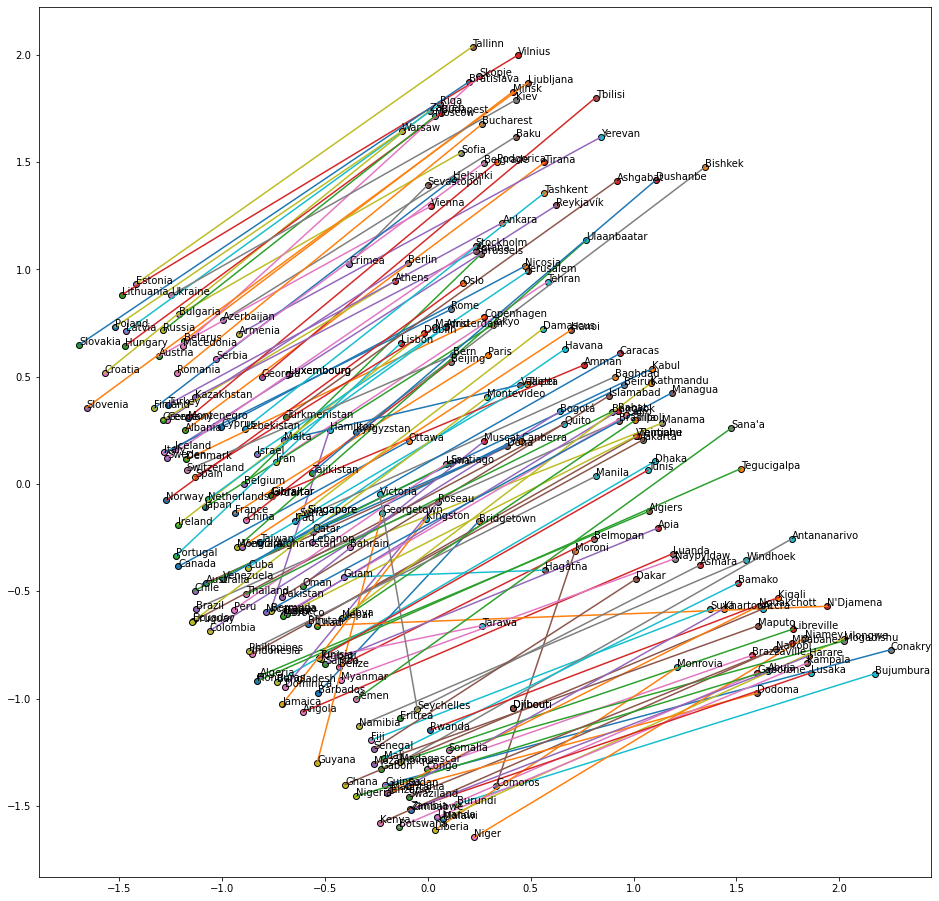

In [ ]:
from sklearn.decomposition import PCA

#
# TODO
# use PCA from sklearn.decomposition to project the countries and capitals into 2D.
# draw lines connecting each country with its capital
#
# Hint:
# - the function "annotate" can be used to put text onto the plot
#

pca = PCA(n_components=2)
geo_vecs_projected = pca.fit_transform(geo_vecs)

plt.figure(figsize=(16, 16))

for i, vector in enumerate(geo_vecs_projected):
    plt.scatter(vector[0], vector[1], edgecolors='black')
    plt.annotate(geo[i], xy=(vector[0], vector[1]))
    if geo[i] in capitals:
        capital = capitals[geo[i]]
        idx = geo.index(capital)  
        country = geo_vecs_projected[idx]
        plt.plot((vector[0], country[0]), (vector[1], country[1]))
plt.show()

## 1.4: PCA vs t-SNE on frequent words

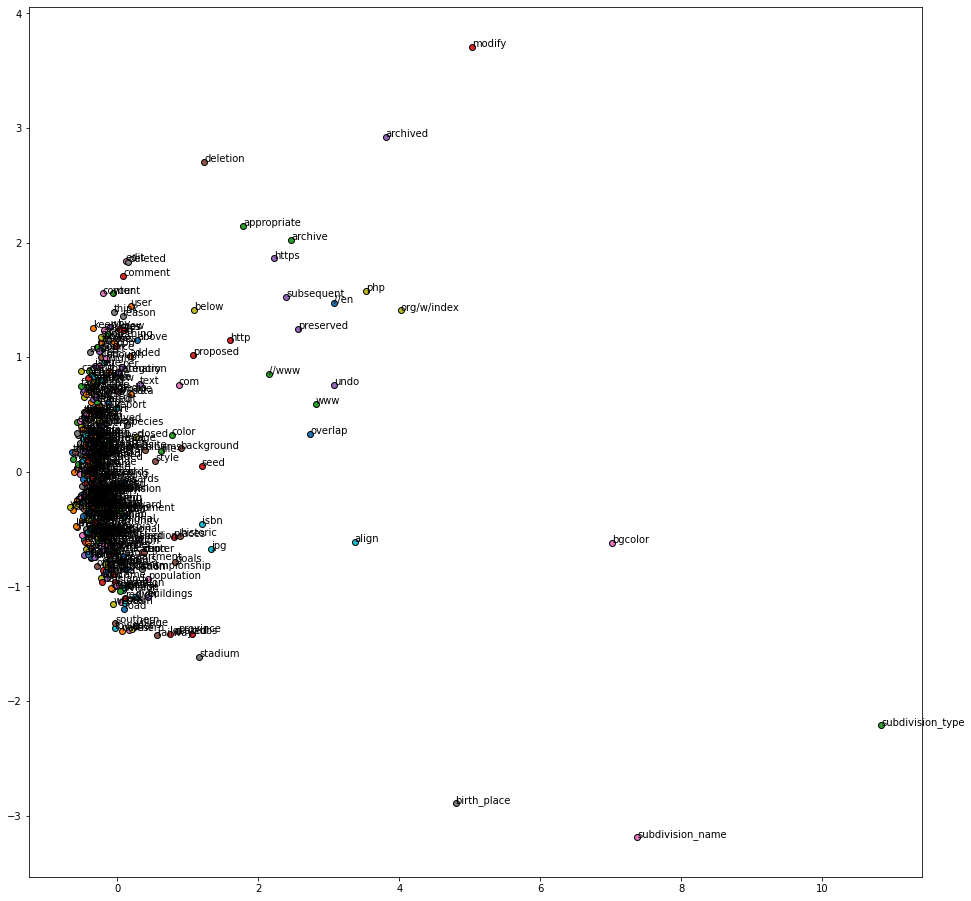

In [ ]:
# Select words starting from the 200th to ommit stop words,
# which have at least 3 chars
top_words = [w for (i,w) in enumerate(ftext.idx2word) \
             if i > 200 and len(w) >= 3][:400]
top_inds = [ftext.word2idx[w] for w in top_words]

data = ftext.vec[top_inds]
#
# TODO: make a 2D PCA projection of the selected words.
#
pca = PCA(n_components=2)
data_projected = pca.fit_transform(data)

plt.figure(figsize=(16, 16))

for i, vector in enumerate(data_projected):
    plt.scatter(vector[0], vector[1], edgecolors='black')
    plt.annotate(top_words[i], xy=(vector[0], vector[1]))
plt.show()

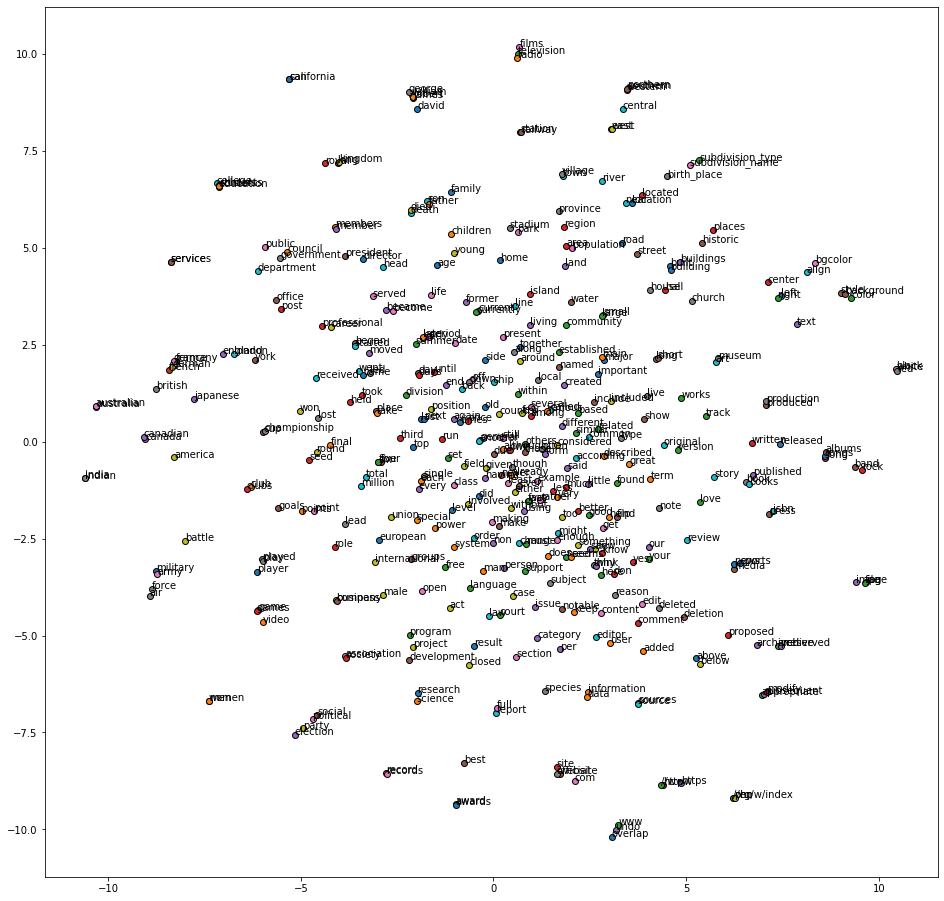

1.0110715627670288


In [ ]:
from sklearn.manifold import TSNE

#
# TODO: make a 2D t-SNE projection of the selected words.
# Things will cluster much nicer
#
tsne = TSNE(n_components=2, perplexity=50, learning_rate=5)
data_projected = tsne.fit_transform(data)

plt.figure(figsize=(16, 16))

for i, vector in enumerate(data_projected):
    plt.scatter(vector[0], vector[1], edgecolors='black')
    plt.annotate(top_words[i], xy=(vector[0], vector[1]))
plt.show()
print(tsne.kl_divergence_)

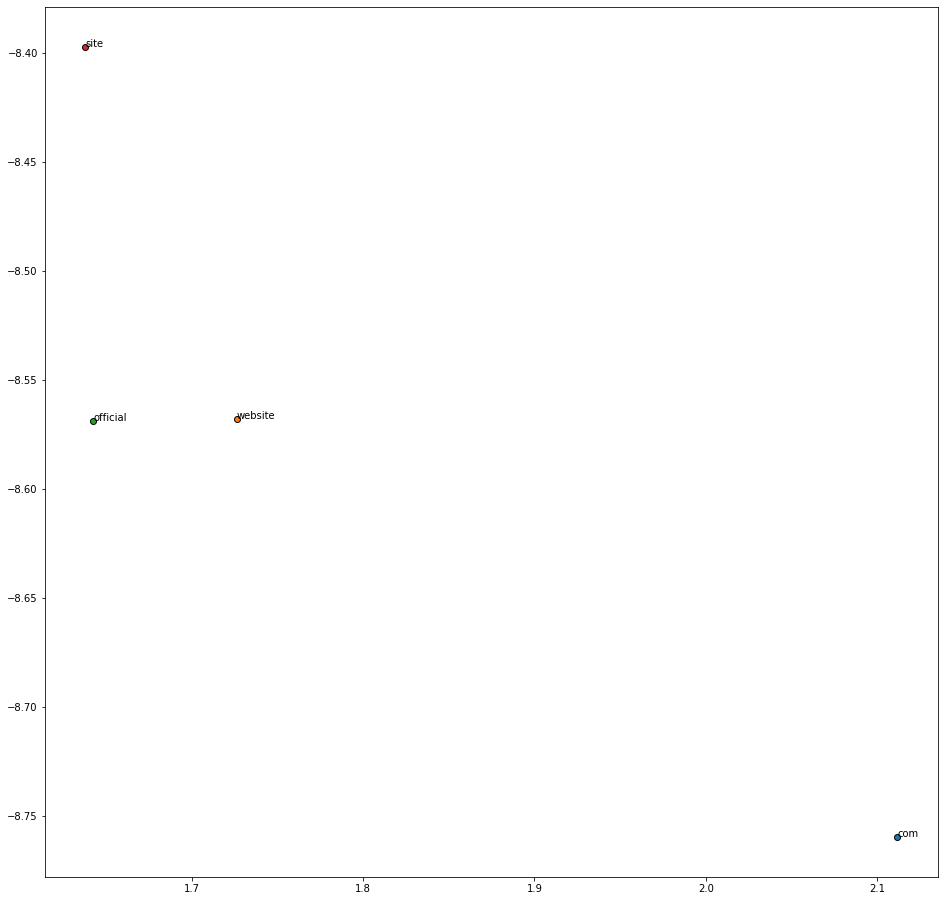

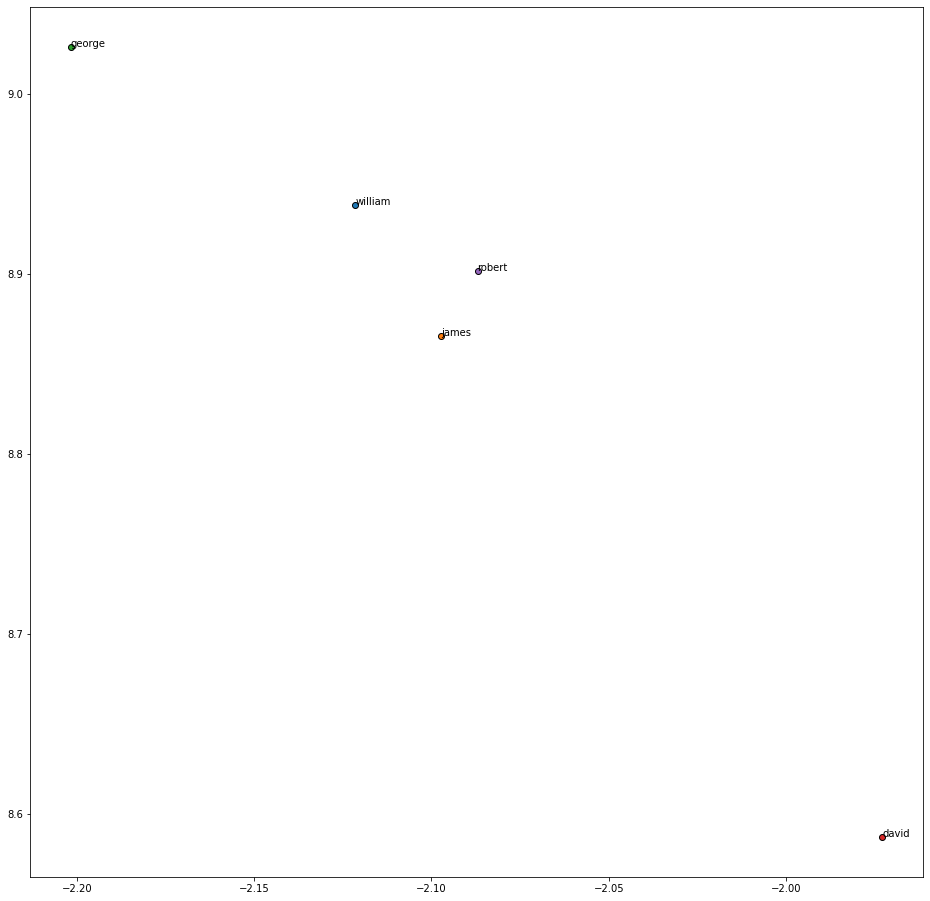

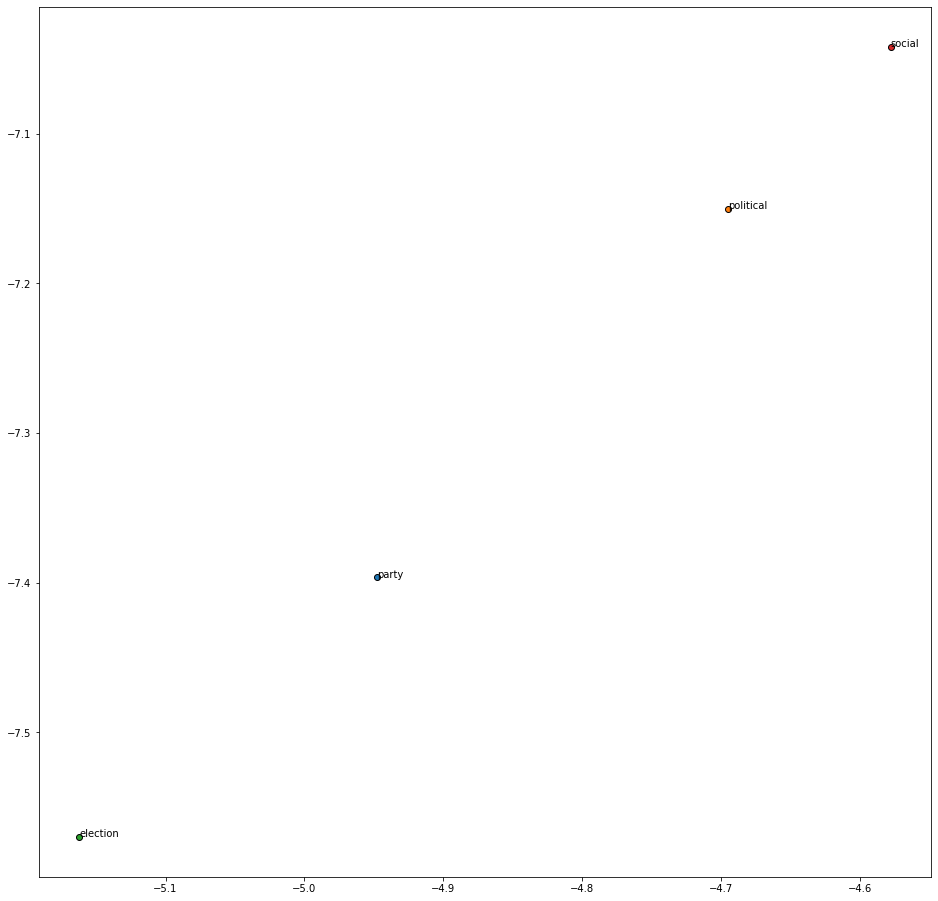

In [ ]:
# TODO: zomm in on 3 meaningful clusters
xlim=(1, 2.5)
ylim=(-9, -7)
plt.figure(figsize=(16, 16))
for i, t in enumerate(data_projected):
    x, y = t
    if xlim[0] < x < xlim[1] and ylim[0] < y < ylim[1]:
        plt.scatter(x, y, edgecolors='black')
        plt.annotate(top_words[i], xy=(x, y))
plt.show()


xlim=(-2.5, -1)
ylim=(8, 10)
plt.figure(figsize=(16, 16))
for i, t in enumerate(data_projected):
    x, y = t
    if xlim[0] < x < xlim[1] and ylim[0] < y < ylim[1]:
        plt.scatter(x, y, edgecolors='black')
        plt.annotate(top_words[i], xy=(x, y))

plt.show()


xlim=(-5.5, -4)
ylim=(-8, -6)
plt.figure(figsize=(16, 16))
for i, t in enumerate(data_projected):
    x, y = t
    if xlim[0] < x < xlim[1] and ylim[0] < y < ylim[1]:
        plt.scatter(x, y, edgecolors='black')
        plt.annotate(top_words[i], xy=(x, y))

plt.show()

## Problem 2

In [ ]:
prompts = []
responses = []
err_lines = []
with open('./hackernews_pairs.txt') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        line = line.split('\t')
        if len(line)!=2:
            err_lines.append(line)
        else:
            prompts.append(line[0])
            responses.append(line[1])
print(f"Failed to parse the following {len(err_lines)} lines: {err_lines}") 
print(f"Sample fialogue pairs: \n{pprint.pformat(list(zip(prompts[:15], responses)))}")

Failed to parse the following 0 lines: []
Sample fialogue pairs: 
[('Ah, yep, that was the issue.',
  'Yeah, options typically cost the company very little.'),
 ("Cross multiplication is a trick to multiply by the 'reciprocal' of the "
  'fraction.',
  'Oh, I see.'),
 ("Cross multiplication is a trick to multiply by the 'reciprocal' of the "
  'fraction.',
  'Whaaa?'),
 ('Quite cool.', 'It gets into a pretty philosophical area.'),
 ("If only the packaging smells, then I agree, it's not damaged.",
  'Sounds like entitlement to me.'),
 ("That's what nationalist politics always says.", 'Can you prove that?'),
 ('Misleading title.', 'Not really.'),
 ('Misleading title.',
  'It is not completely misleading to all users but enough for me to say '
  'something.'),
 ('Why the hell is this getting downvoted?',
  "Because it's clear the person he's responding to understood that "
  'relationship.'),
 ("There's a web without ads.",
  'This just came to mind when you mentioned "ad tax".'),
 ('God 

In [ ]:
class BasicEncoder:
    def encode(self, sentence):
        # this is a base class!
        raise NotImplementedError

    def encode_corpus(self, sentences):
        ret = [self.encode(sentence) for sentence in tqdm(sentences)]
        return np.vstack(ret)

The code below implements a simple baseline: we encode each sentence as a sparse vector which sums word occurrences.

In [ ]:
class OneHotEncoder(BasicEncoder):
    def __init__(self, sentences):
        self.vectorizer = sklearn.feature_extraction.text.CountVectorizer()
        self.vectorizer.fit(sentences)
    
    def encode(self, sentence):
        return self.vectorizer.transform([sentence])[0]

    def encode_corpus(self, sentences):
        # Override because sklearn already works on batches
        encodings = self.vectorizer.transform(sentences)
        # Note: this code needs to handl the scipy sparse matrix
        # which has subtle differences with numpy ndarrays
        norms = np.array((encodings.power(2)).sum(1))**0.5
        encodings = encodings.multiply(1.0 / norms)
        return encodings

encoder = OneHotEncoder(prompts)
encodings = encoder.encode_corpus(prompts)

prompt = "Ultimate question: Windows or Linux?"
enc = encoder.encode(prompt)

# Deal with encodings being sparse matrices. Word2vecs will not have the pecularities
scores = (encodings @ enc.T).toarray().ravel()
top_idx = scores.argsort()[-10:][::-1]

for idx in top_idx:
    print(scores[idx], prompts[idx], ':', responses[idx])

1.0 Question. : In a sense 'maybe not'.
1.0 Linux? : Unfortunately not.
1.0 Windows? : Unix based systems
1.0 Question. : This is a good question!
0.8017837257372732 Hardware or software or technique or best practices... : Mobile phones that still work when you drop them.
0.8017837257372732 Hardware or software or technique or best practices... : Floppy disk and cd/dvd drives!
0.8017837257372732 Hardware or software or technique or best practices... : Building your own desktop.
0.8017837257372732 Hardware or software or technique or best practices... : Extreme programming.
0.8017837257372732 Hardware or software or technique or best practices... : Zip drives.
0.8017837257372732 Hardware or software or technique or best practices... : It can all go.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


### 2.1

Prosta funkcja generująca rozmowę bota z samym sobą. Gdy wypowiedzi bota nie są związane z żadną konkretną wypowiedzią, tylko jak w trzecim poniższym przykładzie o tonie czy jakości odpowiedzi drugiego rozmówcy, to wygląda "w miarę" sensownie.

In [ ]:
# TODO: build a simple dialogue system using these k-neares neighbor matches, 
# perform a few test conversations
def make_conversation(prompt, encoder, encodings, conversation_length=10, k_best=1):
    conversation = []
    conversation.append(prompt)
    for _ in range(conversation_length):
        enc = encoder.encode(prompt)
        scores = (encodings @ enc.T).toarray().ravel()
        top_idx = scores.argsort()[-k_best:][::-1]
        prompt = responses[np.random.choice(top_idx, 1, p=(scores[top_idx] / scores[top_idx].sum()))[0]]
        conversation.append(prompt)
    return conversation

In [ ]:
make_conversation("Ultimate question: Windows or Linux?", encoder, encodings, conversation_length=10, k_best=1)

['Ultimate question: Windows or Linux?',
 "In a sense 'maybe not'.",
 "The incentives don't quite work like that though.",
 'i agree.',
 "It is nauseating because it's a 1000 word humblebrag.",
 'It would be a missed opportunity not to include such features.',
 "It ships with mouse drivers, they don't work.",
 'Yes, they do and the travel is easily seen.',
 'Hmm.',
 'Exactly!',
 "I'm glad to know about the stuff he revealed."]

In [ ]:
make_conversation("Ultimate question: Windows or Linux?", encoder, encodings, conversation_length=10, k_best=3)

['Ultimate question: Windows or Linux?',
 'Unfortunately not.',
 'got it.',
 'Yup.',
 'Do you have a source for this?',
 'Disclaimer: googler, but not working on storage.',
 'It looks like the wrong link was submitted.',
 'Yes.',
 '100% agreed.',
 'Also happens with religion.',
 'Oh paypal.']

In [ ]:
make_conversation("She hasn't been self-employed in 38 years.", encoder, encodings, conversation_length=10, k_best=2)

["She hasn't been self-employed in 38 years.",
 'You retire when you hang up your hat and start getting pension.',
 'Heh, your age is showing.',
 "I don't think you're disproving his comment.",
 "Enlighten me on what you think I don't understand.",
 'Yes, I get that.',
 "No, he's not asserting any such thing.",
 "I'm genuinely curious what you're talking about here.",
 "Well, I'm certainly not going to take you at your word for any of this.",
 'Do return with commentary.',
 "Thanks for the thoughtful reply, you've obviously researched this."]

In [ ]:
make_conversation("Cross multiplication is a trick to multiply by the 'reciprocal' of the "
  'fraction.', encoder, encodings, conversation_length=10, k_best=3)

["Cross multiplication is a trick to multiply by the 'reciprocal' of the fraction.",
 'Even the sound of the newer engines is reduced.',
 "I don't think it's different and I don't know why either is illegal.",
 'If this was done in 2005, I think it would have been a different story',
 'My heart sank as I read this post and looked at the product.',
 'Thank you for your honest feedback.',
 'Ethics and law are two very different things.',
 "You're right that the cycle lanes shown are awful in almost every way.",
 'Their not without faults - no company is.',
 "Yup, it's just back online.",
 'This is another great point!']

### 2.2

In [ ]:
class Word2VecEncoder(BasicEncoder):
    def __init__(self, vecs):
        self._vecs = vecs

    def _get_vec(self, word):
        # Find the vector for word, or use a suitbale out-of-vocabulary vector
        # For extra points try backing off to a lowercased dictionary
        if not word in self._vecs.word2idx:
          return np.zeros(self._vecs.vec.shape[1])
        word_idx = self._vecs.word2idx[word]
        word_vector = self._vecs.vec[word_idx]
        return word_vector

    def encode(self, sentence):
        ret = np.zeros(self._vecs.vec.shape[1])
        for token in nltk.tokenize.word_tokenize(sentence):
            word_vec = self._get_vec(token)
            ret += word_vec
        ret /= (np.linalg.norm(ret) + 1e-5)
        return ret

encoder = Word2VecEncoder(word2vec)
encodings = encoder.encode_corpus(prompts)

In [ ]:
def make_conversation(prompt, encoder, encodings, conversation_length=10, k_best=1, normalize=False, 
                      similarity="euclidean"):
    enc = encoder.encode(prompt)
    if normalize:
        # encodings = encodings.copy()
        # encodings = encodings / (np.sqrt((encodings ** 2).sum(axis=1))[:, None] + 1e-6)
        enc = enc / (np.sqrt((enc ** 2).sum()) + 1e-6)
        
    conversation = []
    conversation.append(prompt)
    for _ in range(conversation_length):
        if similarity == "euclidean":
            scores = ((encodings - enc) ** 2).sum(axis=1)
            top_idx = scores.argsort()[-k_best:][::-1]
            # print(scores[top_idx])
        if similarity == "cosine":
            scores = (enc @ (encodings.T)).ravel()
            top_idx = scores.argsort()[-k_best:][::-1]
            # print(scores[top_idx])
        prompt = responses[np.random.choice(top_idx, 1, p=(scores[top_idx] / scores[top_idx].sum()))[0]]
        conversation.append(prompt)
        enc = encoder.encode(prompt)
        if normalize:
            enc = enc / (np.sqrt((enc ** 2).sum()) + 1e-6)
    return conversation

Euklidesowski dystans

In [ ]:
make_conversation("She hasn't been self-employed in 38 years.", encoder, encodings, conversation_length=5, k_best=1, 
                  normalize=False, similarity="euclidean")

["She hasn't been self-employed in 38 years.",
 "Rounding is something humans can't do either.",
 "I hadn't heard about it till now.",
 'I am a neural network, and I can round.',
 'Holy fuck people get confused.',
 "No worries - I appreciate you're probably slammed with many other things to do."]

In [ ]:
make_conversation("Hello my friend from old times", encoder, encodings, conversation_length=5, k_best=1, 
                  normalize=False, similarity="euclidean")

['Hello my friend from old times',
 "I'm sure this bias has a name?",
 'Holy fuck people get confused.',
 "No worries - I appreciate you're probably slammed with many other things to do.",
 'Something more practical I mean ...',
 "You're getting it."]

In [ ]:
make_conversation("She hasn't been self-employed in 38 years.", encoder, encodings, conversation_length=5, k_best=1, 
                  normalize=True, similarity="euclidean")

["She hasn't been self-employed in 38 years.",
 "Rounding is something humans can't do either.",
 "I hadn't heard about it till now.",
 'I am a neural network, and I can round.',
 'Holy fuck people get confused.',
 "No worries - I appreciate you're probably slammed with many other things to do."]

In [ ]:
make_conversation("Hello my friend from old times", encoder, encodings, conversation_length=5, k_best=1, 
                  normalize=True, similarity="euclidean")

['Hello my friend from old times',
 "I'm sure this bias has a name?",
 'Holy fuck people get confused.',
 "No worries - I appreciate you're probably slammed with many other things to do.",
 'Something more practical I mean ...',
 "You're getting it."]

Cosinusowy dystans

In [ ]:
make_conversation("She hasn't been self-employed in 38 years.", encoder, encodings, conversation_length=5, k_best=1, 
                  normalize=False, similarity="cosine")

["She hasn't been self-employed in 38 years.",
 'You retire when you hang up your hat and start getting pension.',
 'Heh, your age is showing.',
 "That's not what unfalsifiable means.",
 '"not able to be proven false, but not necessarily true."',
 "Sounds like you found a plum position because it's certainly not the norm."]

In [ ]:
make_conversation("Hello my friend from old times", encoder, encodings, conversation_length=5, k_best=1, 
                  normalize=False, similarity="cosine")

['Hello my friend from old times',
 "It's time to deal with you again...",
 '"...I didn\'t expect that it would come to resemble a brothel."',
 'Are you self diagnosed?',
 'No, I was diagnosed by two psychiatrists (I wanted a second opinion).',
 'Had the same thing happen when I broke my hand.']

In [ ]:
make_conversation("She hasn't been self-employed in 38 years.", encoder, encodings, conversation_length=5, k_best=1, 
                  normalize=True, similarity="cosine")

["She hasn't been self-employed in 38 years.",
 'You retire when you hang up your hat and start getting pension.',
 'Heh, your age is showing.',
 "That's not what unfalsifiable means.",
 '"not able to be proven false, but not necessarily true."',
 "Sounds like you found a plum position because it's certainly not the norm."]

In [ ]:
make_conversation("Hello my friend from old times", encoder, encodings, conversation_length=5, k_best=1, 
                  normalize=True, similarity="cosine")

['Hello my friend from old times',
 "It's time to deal with you again...",
 '"...I didn\'t expect that it would come to resemble a brothel."',
 'Are you self diagnosed?',
 'No, I was diagnosed by two psychiatrists (I wanted a second opinion).',
 'Had the same thing happen when I broke my hand.']

Nie udało mi się zaobserwoać żadnych różnic po normalizacji. Odległość cosinusowa daje lepszej jakości rozmowy.

### 2.3 BERT

Załadowałem przetrenowanego berta, przepuściłem przez niego prompty i policzyłem średnią zaenkondowanych słów tak jak zostało zaproponowane w treści zadania.

In [ ]:
!pip install transformers

In [ ]:
import transformers
torch.autograd.set_grad_enabled(False)

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertModel.from_pretrained('bert-base-cased')

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def to_np(x):
    return x.detach().cpu().numpy()

In [ ]:
transformers_encodings = np.zeros((len(prompts),768))
batch_size = 24
for i in tqdm(range(0, len(prompts), batch_size)):
    pt_batch = tokenizer(
        prompts[i:i+batch_size],
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )
    output = model(**pt_batch)
    tokens_encodings = torch.mean(output.last_hidden_state, dim=1)
    numpy_vectors = to_np(tokens_encodings)
    transformers_encodings[i:i+batch_size] = numpy_vectors

### 2.4

Nieparzyste wypowiedzi są wprowadzonymi przez użytkownika. Chatbot oparty na bertcie nie produkuje żadnych sensownych odpowiedzi. Może jest minimalna poprawa z liczeniem średniej poprzednich dotychczasowych wypowiedzi.

In [ ]:
def chatbot(tokenizer, model, encodings, conversation_length=5, k_best=1, similarity="euclidean", 
            running_average=False, also_average_responses=False):
    if running_average:
        sum_of_past = np.zeros((1, 768))
        counter = 0
    for i in range(conversation_length):
        sentence = input()
        tokenized = tokenizer(
            [sentence],
            padding=True,
            truncation=True,
            max_length=512,
            return_tensors="pt"
        )
        output = model(**tokenized)
        sentence_encoding = torch.mean(output.last_hidden_state, dim=1)
        enc = to_np(sentence_encoding)
        if running_average:
            counter += 1
            sum_of_past += enc
            enc = sum_of_past / counter
        # print(enc.shape, encodings.shape)
        if similarity == "euclidean":
            scores = ((encodings - enc) ** 2).sum(axis=1)
            top_idx = scores.argsort()[-k_best:][::-1]
        if similarity == "cosine":
            scores = (enc @ (encodings.T)).ravel()
            top_idx = scores.argsort()[-k_best:][::-1]
        resp = responses[np.random.choice(top_idx, 1, p=(scores[top_idx] / scores[top_idx].sum()))[0]]
        print(resp)
        if running_average and also_average_responses:
            counter += 1
            tokenized = tokenizer(
                [resp],
                padding=True,
                truncation=True,
                max_length=512,
                return_tensors="pt"
            )
            output = model(**tokenized)
            sentence_encoding = torch.mean(output.last_hidden_state, dim=1)
            enc = to_np(sentence_encoding)
            sum_of_past += enc
            enc = sum_of_past / counter

In [ ]:
chatbot(tokenizer, model, transformers_encodings, conversation_length=5, k_best=1, similarity="cosine")

Hi
Hiya!
I have a blog about astronomy
Fair, but I think this is just a project of the new 18f initiative.
What is this project about?
He doesn't care.
About what?
It's not "inside" trading if it's data available in the marketplace.
I don't know any market laws
Useful, thank you.


In [ ]:
chatbot(tokenizer, model, transformers_encodings, conversation_length=5, k_best=1, similarity="cosine", running_average=True)

I very like playing tennis
Any suggestion?
You should start with hitting the ball
Sure, I'd go along with that.
Accualy before that you need to buy a racket
Sure, I'd go along with that.
Are you planing to become a professional?
That correct.
Where are you going to play?
Sure, I'd go along with that.


In [ ]:
chatbot(tokenizer, model, transformers_encodings, conversation_length=5, k_best=1, similarity="cosine", running_average=True)

I'm going to travel to USA next week.
your customers opinion of the product matters more than everything else.
They have nothing to do with that
Have you checked your profile settings page recently?
I have only facebook and I didn't check it.
Have you checked your profile settings page recently?
No
Well, I'm certainly not going to take you at your word for any of this.
Let's end that conversation.
Well, I'm certainly not going to take you at your word for any of this.


In [ ]:
chatbot(tokenizer, model, transformers_encodings, conversation_length=5, k_best=1, similarity="cosine", 
        running_average=True, also_average_responses=True)

I very like playing tennis.
Any suggestion?
You should buy a racket and start hitting the ball.
Full disclaimer, I work for a somewhat prestigious air filtration company.
Then you should change profession and become a player.
Agreed, I like to see simple fun stuff on here as well.
What do you find that funny?
You are welcome!
Ok, I'm done.
You are welcome!


### 2.8

Wyczytałem z różnych źródeł, że tokenizator berta dodaje w czasie tokenizacji jako pierwszy token CLS który odpowiada za podsumowywanie tekstu (oraz tokeny SEP oddzielające zdania). Embeding odpowiadający temu tokenowi zawiera więc reprezentację całego tekstu. Ciężko powiedzieć czy dało to jakąś poprawę.

In [ ]:
transformers_encodings_2 = np.zeros((len(prompts),768))
batch_size = 24
for i in tqdm(range(0, len(prompts), batch_size)):
    pt_batch = tokenizer(
        prompts[i:i+batch_size],
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )
    output = model(**pt_batch)
    tokens_encodings = output.last_hidden_state[:, 0, :]
    numpy_vectors = to_np(tokens_encodings)
    transformers_encodings_2[i:i+batch_size] = numpy_vectors

In [ ]:
chatbot(tokenizer, model, transformers_encodings_2, conversation_length=5, k_best=1, similarity="cosine")

I very like playing tennis.
I've seen lots of 68k wire wrapped projects out there on the web.
My last project used deep learning.
The point is that "outside your work hours" is undefined.
I work only from Monday to Friday.
So you don't get to eat dinner with the kids?
Unfortunatly I don't have any children.
got it.
Let's end that conversation.
Great to hear.


In [ ]:
chatbot(tokenizer, model, transformers_encodings_2, conversation_length=5, k_best=1, similarity="cosine", 
        running_average=True, also_average_responses=True)

I very like playing tennis.
I've seen lots of 68k wire wrapped projects out there on the web.
I'm playing on many tournaments every holiday.
got it.
If you want to start playing it, you must be aware it takes much time to learn.
Drive through the zombie apocalypse in comfort?
I think this scenario is not possible.
Well, given how common forest fires are, I think it can be useful.
It reminds me of situation in Australia.
Drive through the zombie apocalypse in comfort?


# Random tests - don't check

In [ ]:
# test1 = tokenizer("Random sentence")
test2 = tokenizer(
    ["Random sentence"],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt"
)
test = model(**test2)
# test.last_hidden_state.shape
test_tokens_encodings = torch.mean(test.last_hidden_state, dim=1)
test_numpy_vectors = to_np(test_tokens_encodings)
test_numpy_vectors.shape

(1, 768)

In [ ]:
(np.zeros((3, 768)) - test_numpy_vectors).shape

(3, 768)

In [ ]:
test = np.zeros(5)
test[2:4] = np.ones(2)
test

array([0., 0., 1., 1., 0.])

In [ ]:
def assign_GPU(Tokenizer_output):

    tokens_tensor = Tokenizer_output['input_ids'].to('cuda:0')
    token_type_ids = Tokenizer_output['token_type_ids'].to('cuda:0')
    attention_mask = Tokenizer_output['attention_mask'].to('cuda:0')

    output = {'input_ids' : tokens_tensor, 
            'token_type_ids' : token_type_ids, 
            'attention_mask' : attention_mask}

return output

sentence  = 'Hello World!'
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
model     = BertModel.from_pretrained('bert-large-uncased')

inputs    = assign_GPU(tokenizer(sentence, return_tensors="pt"))
model     = model.to('cuda:0')
outputs   = model(**inputs)
outputs


inputs    = tokenizer(sentence, return_tensors="pt").to(device)